In [1]:
import os
from pathlib import Path
from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
PATH_ROOT = Path(os.getcwd()).absolute().parent
print(PATH_ROOT)

/home/lukec/workspace/label_flip_revised


## Plot correlations between C-Measures and Test Accuracy on clean data

In [3]:
path_cm_clean = glob(os.path.join(PATH_ROOT, 'results', 'synth_svm', '*clean*.csv'))
print(path_cm_clean)

['/home/lukec/workspace/label_flip_revised/results/synth_svm/synth_svm_clean_0.csv', '/home/lukec/workspace/label_flip_revised/results/synth_svm/synth_svm_clean_1.csv', '/home/lukec/workspace/label_flip_revised/results/synth_svm/synth_svm_clean_2.csv']


In [4]:
df_c_measure = pd.DataFrame()
for p in path_cm_clean:
    _df = pd.read_csv(p)
    df_c_measure = pd.concat([df_c_measure, _df])

df_c_measure

,Data,overlapping.F1.mean,overlapping.F1.sd,overlapping.F1v.mean,overlapping.F1v.sd,overlapping.F2.mean,overlapping.F2.sd,overlapping.F3.mean,overlapping.F3.sd,overlapping.F4.mean,...,linearity.L3.sd,dimensionality.T2,dimensionality.T3,dimensionality.T4,balance.C1,balance.C2,network.Density,network.ClsCoef,network.Hubs.mean,network.Hubs.sd
0,f04_i02_r00_c01_w6_1.csv,0.810730,0.372452,0.054200,NaN,0.334868,NaN,0.5040,NaN,0.4245,...,NaN,0.0020,0.0020,1.000000,0.970657,0.077664,0.848518,0.406686,0.766283,0.302880
1,f04_i02_r01_c01_w5_1.csv,0.611179,0.449290,0.043539,NaN,0.835243,NaN,0.9165,NaN,0.8680,...,NaN,0.0020,0.0015,0.750000,1.000000,0.000000,0.824310,0.330959,0.814283,0.221256
2,f04_i03_r00_c02_w5_1.csv,0.788140,0.256240,0.115885,NaN,0.744394,NaN,0.8925,NaN,0.8685,...,NaN,0.0020,0.0020,1.000000,1.000000,0.000000,0.860769,0.390880,0.747007,0.305292
3,f04_i03_r01_c01_w6_1.csv,0.429929,0.201707,0.031733,NaN,0.197845,NaN,0.5455,NaN,0.5300,...,NaN,0.0020,0.0015,0.750000,0.972961,0.071823,0.822687,0.307840,0.750106,0.329192
4,f05_i03_r02_c02_w5_1.csv,0.799987,0.201796,0.127439,NaN,0.663490,NaN,0.9220,NaN,0.7945,...,NaN,0.0025,0.0015,0.600000,0.999997,0.000008,0.864595,0.262166,0.819075,0.251342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,f30_i27_r01_c01_w6_1.csv,0.970729,0.049059,0.141101,NaN,0.012527,NaN,0.9685,NaN,0.8175,...,NaN,0.0150,0.0110,0.733333,0.971533,0.075450,0.871958,0.569480,0.726014,0.244403
96,f30_i27_r01_c13_w5_1.csv,0.993482,0.010085,0.550902,NaN,0.027854,NaN,0.9945,NaN,0.9275,...,NaN,0.0150,0.0125,0.833333,0.999994,0.000018,0.893963,0.613341,0.771873,0.243977
97,f30_i28_r02_c05_w5_1.csv,0.985669,0.018146,0.360492,NaN,0.034833,NaN,0.9910,NaN,0.9195,...,NaN,0.0150,0.0125,0.833333,0.999994,0.000018,0.886141,0.585342,0.797491,0.223961
98,f30_i29_r00_c22_w6_1.csv,0.997904,0.002624,0.805732,NaN,0.043719,NaN,0.9935,NaN,0.9240,...,NaN,0.0150,0.0140,0.933333,0.972678,0.072542,0.913843,0.726942,0.609342,0.326444


In [5]:
# Remove NA
print('# of columns before removing NA:', len(df_c_measure.columns) - 1)  # Name does not count
cols_not_na = df_c_measure.columns[df_c_measure.notna().any()].tolist()
df_c_measure = df_c_measure[cols_not_na]
print('# of columns after removing NA:', len(df_c_measure.columns) - 1)  # Name does not count
print(cols_not_na)


# of columns before removing NA: 35
# of columns after removing NA: 28
['Data', 'overlapping.F1.mean', 'overlapping.F1.sd', 'overlapping.F1v.mean', 'overlapping.F2.mean', 'overlapping.F3.mean', 'overlapping.F4.mean', 'neighborhood.N1', 'neighborhood.N2.mean', 'neighborhood.N2.sd', 'neighborhood.N3.mean', 'neighborhood.N3.sd', 'neighborhood.N4.mean', 'neighborhood.N4.sd', 'neighborhood.T1.mean', 'neighborhood.T1.sd', 'neighborhood.LSC', 'linearity.L1.mean', 'linearity.L2.mean', 'linearity.L3.mean', 'dimensionality.T2', 'dimensionality.T3', 'dimensionality.T4', 'balance.C1', 'balance.C2', 'network.Density', 'network.ClsCoef', 'network.Hubs.mean', 'network.Hubs.sd']


In [6]:
# Rename Columns
new_cols = [
    'Data', 'F1', 'F1 SD', 'F1v', 'F2', 'F3', 'F4', 'N1', 
    'N2', 'N2 SD', 'N3 ', 'N3 SD', 'N4', 'N4 SD', 'T1', 'T1 SD', 'LSC', 
    'L1', 'L2', 'L3', 'T2', 'T3', 'T4', 'C1', 'C2', 'Density', 'ClsCoef', 
    'Hubs', 'HubsSD']
new_names_map = {df_c_measure.columns[i]:new_cols[i] for i in range(len(new_cols))}

df_c_measure.rename(new_names_map, axis=1, inplace=True)

df_c_measure.head()

/home/lukec/venv/torch/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Data,F1,F1 SD,F1v,F2,F3,F4,N1,N2,N2 SD,...,L3,T2,T3,T4,C1,C2,Density,ClsCoef,Hubs,HubsSD
0,f04_i02_r00_c01_w6_1.csv,0.810730,0.372452,0.054200,0.334868,0.5040,0.4245,0.0300,0.200008,0.109163,...,0.0045,0.0020,0.0020,1.00,0.970657,0.077664,0.848518,0.406686,0.766283,0.302880
1,f04_i02_r01_c01_w5_1.csv,0.611179,0.449290,0.043539,0.835243,0.9165,0.8680,0.0320,0.122324,0.125320,...,0.0100,0.0020,0.0015,0.75,1.000000,0.000000,0.824310,0.330959,0.814283,0.221256
2,f04_i03_r00_c02_w5_1.csv,0.788140,0.256240,0.115885,0.744394,0.8925,0.8685,0.1655,0.282835,0.160548,...,0.0505,0.0020,0.0020,1.00,1.000000,0.000000,0.860769,0.390880,0.747007,0.305292
3,f04_i03_r01_c01_w6_1.csv,0.429929,0.201707,0.031733,0.197845,0.5455,0.5300,0.0575,0.123122,0.156043,...,0.0125,0.0020,0.0015,0.75,0.972961,0.071823,0.822687,0.307840,0.750106,0.329192
4,f05_i03_r02_c02_w5_1.csv,0.799987,0.201796,0.127439,0.663490,0.9220,0.7945,0.1525,0.217652,0.194484,...,0.0575,0.0025,0.0015,0.60,0.999997,0.000008,0.864595,0.262166,0.819075,0.251342


## Get scores

In [7]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

from label_flip_revised.utils import open_csv
from label_flip_revised.simple_nn_model import SimpleModel
from label_flip_revised.torch_utils import evaluate, train_model

In [8]:
def get_dataloader(X, y, batch_size=128, shuffle=True):
    dataset = TensorDataset(torch.from_numpy(X).type(torch.float32),
                                  torch.from_numpy(y).type(torch.int64))
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)
    return dataloader

In [9]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
    print('Running on CPU!')

In [10]:
HIDDEN_LAYER = 128

In [11]:
path_output = os.path.join(PATH_ROOT, 'results')
path_plot = os.path.join(path_output, 'synth_clean_score.csv')

acc_train = []
acc_test = []
datanames = []

if os.path.exists(path_plot):
    df = pd.read_csv(path_plot)
    acc_train = df['train'].to_list()
    acc_test = df['test'].to_list()
    datanames = df['data'].to_list()
else:
    postfix_train = '_clean_train.csv'
    postfix_clean = '_clean_test.csv'
    postfix_torch = '_SimpleNN.torch'

    for i in range(df_c_measure.shape[0]):
        dataname = df_c_measure.iloc[i]['Data'].split('.')[0]
        datanames.append(dataname)

        X_train, y_train, _ = open_csv(os.path.join(PATH_ROOT, 'data', 'synth', 'train', f'{dataname}{postfix_train}'))
        X_test, y_test, _ = open_csv(os.path.join(PATH_ROOT, 'data', 'synth', 'test', f'{dataname}{postfix_clean}'))
        n_features = X_train.shape[1]

        dataloader_train = get_dataloader(X_train, y_train, shuffle=False)
        dataloader_test = get_dataloader(X_test, y_test, shuffle=False)

        model = SimpleModel(n_features, hidden_dim=HIDDEN_LAYER, output_dim=2).to(device)
        loss_fn = nn.CrossEntropyLoss()
        path_model = os.path.join(PATH_ROOT, 'data', 'synth','torch', f'{dataname}{postfix_torch}')
        model.load_state_dict(torch.load(path_model, map_location=device))

        _acc_train, _ = evaluate(dataloader_train, model, loss_fn, device)
        _acc_test, _ = evaluate(dataloader_test, model, loss_fn, device)

        acc_train.append(_acc_train)
        acc_test.append(_acc_test)

        if i % 10 == 0:
            print(f'[{dataname}] Acc train: {_acc_train*100:.2f} test: {_acc_test*100:.2f}')

    results = {
        'data': datanames,
        'train': acc_train,
        'test': acc_test,
    }
    df = pd.DataFrame(results)
    df.to_csv(path_plot, index=False)

In [12]:
cols = [
    'F1', 'F1 SD', 'F1v', 'F2', 'F3', 'F4', 'N1', 
    'N2', 'N2 SD', 'N3 ', 'N3 SD', 'N4', 'N4 SD', 'T1', 'T1 SD', 'LSC', 
    'L1', 'L2', 'L3', 'T2', 'T3', 'T4', 'C1', 'C2', 'Density', 'ClsCoef', 
    'Hubs', 'HubsSD']

In [13]:
figsize=(10, 4)
fontsize = 14
plt.rcParams["font.size"] = fontsize

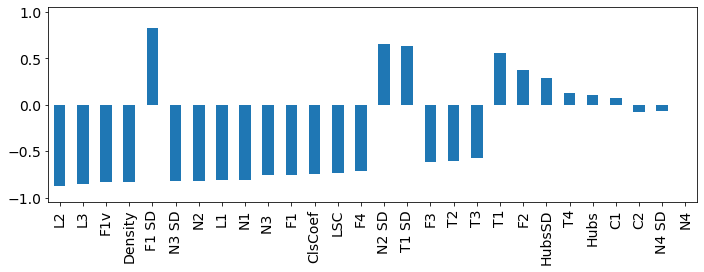

In [14]:
df_c_measure = df_c_measure[cols]
df_c_measure['acc.test'] = acc_test

cor = df_c_measure.corr()
cor_test = cor['acc.test']

plt.figure(figsize=figsize)
cor_test[cor_test.abs().sort_values(ascending=False).keys()[1:]].plot.bar()
plt.title('')
plt.ylim([-1.05, 1.05])
plt.tight_layout()
path_fig = os.path.join(PATH_ROOT, 'results', 'synth_cor_acc_test_clean.pdf')
plt.savefig(path_fig, dpi=300)

path_output = os.path.join(PATH_ROOT, 'results', 'synth_cor_acc_test_clean.csv')
cor_test.to_csv(path_output, index=True)

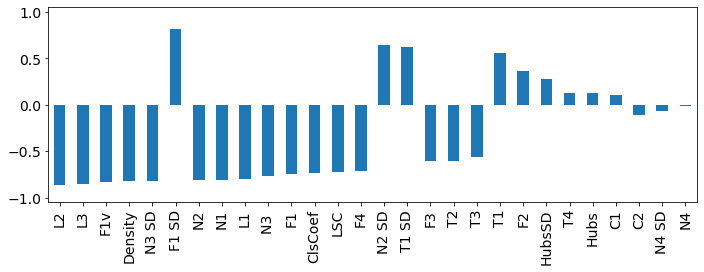

In [15]:
df_c_measure = df_c_measure[cols]
df_c_measure['acc.train'] = acc_train

cor = df_c_measure.corr()
cor_train = cor['acc.train']

plt.figure(figsize=figsize)
cor_train[cor_train.abs().sort_values(ascending=False).keys()[1:]].plot.bar()
plt.title('')
plt.ylim([-1.05, 1.05])
plt.tight_layout()
path_fig = os.path.join(PATH_ROOT, 'results', 'synth_cor_acc_train_clean.pdf')
plt.savefig(path_fig, dpi=300)

path_output = os.path.join(PATH_ROOT, 'results', 'synth_cor_acc_train_clean.csv')
cor_train.to_csv(path_output, index=True)

In [16]:
np.mean(np.abs((cor_train - cor_test) / cor_test))

0.056874678560051115